# BTC Tick Data Database Analysis

This notebook tests and analyzes the SQLite database created by `fetch_btc_tick.py`

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import os

## 1. Database Connection and Basic Info

In [2]:
# Connect to the database
db_path = "btc_tick_data.db"
conn = sqlite3.connect(db_path)

print(f"Database file exists: {os.path.exists(db_path)}")
print(f"Database size: {os.path.getsize(db_path) / (1024*1024):.2f} MB")

Database file exists: True
Database size: 6.25 MB


In [3]:
# Get table info
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in database:", tables)

# Get table schema
cursor.execute("PRAGMA table_info(tick_data);")
schema = cursor.fetchall()
print("\nTable schema:")
for col in schema:
    print(f"  {col[1]} - {col[2]} ({'PRIMARY KEY' if col[5] else 'NOT NULL' if col[3] else 'NULL'})")

Tables in database: [('tick_data',)]

Table schema:
  id - INTEGER (PRIMARY KEY)
  price - REAL (NOT NULL)
  qty - REAL (NOT NULL)
  quoteQty - REAL (NOT NULL)
  time - TIMESTAMP (NOT NULL)
  isBuyerMaker - BOOLEAN (NOT NULL)
  isBestMatch - BOOLEAN (NOT NULL)
  created_at - TIMESTAMP (NULL)


## 2. Data Overview

In [20]:
# Get total record count
cursor.execute("SELECT COUNT(*) FROM tick_data;")
total_records = cursor.fetchone()[0]
print(f"Total tick records: {total_records:,}")

# Get time range
cursor.execute("SELECT MIN(time), MAX(time) FROM tick_data;")
min_time, max_time = cursor.fetchone()
print(f"Time range: {min_time} to {max_time}")

# Calculate duration
if min_time and max_time:
    start_dt = datetime.fromisoformat(min_time)
    end_dt = datetime.fromisoformat(max_time)
    duration = end_dt - start_dt
    print(f"Data collection duration: {duration}")
    print(f"Average ticks per second: {total_records / duration.total_seconds():.2f}")

Total tick records: 40,386
Time range: 2025-10-01T17:36:54.470000 to 2025-10-01T17:51:03.021000
Data collection duration: 0:14:08.551000
Average ticks per second: 47.59


In [21]:
# Load sample data
df_sample = pd.read_sql_query(
    "SELECT * FROM tick_data ORDER BY time LIMIT 10", 
    conn
)
print("First 10 records:")
display(df_sample)

First 10 records:


,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch,created_at
0,5271336763,116358.05,0.00005,5.817903,2025-10-01T17:36:54.470000,1,1,2025-10-01 09:36:51
1,5271336764,116358.05,0.00085,98.904342,2025-10-01T17:36:54.626000,1,1,2025-10-01 09:36:52
2,5271336765,116358.05,0.00097,112.867309,2025-10-01T17:36:54.971000,1,1,2025-10-01 09:36:52
3,5271336766,116358.05,0.02737,3184.719828,2025-10-01T17:36:55.467000,1,1,2025-10-01 09:36:52
4,5271336767,116358.05,0.17602,20481.343961,2025-10-01T17:36:55.488000,1,1,2025-10-01 09:36:53
5,5271336768,116358.05,0.26797,31180.466658,2025-10-01T17:36:55.488000,1,1,2025-10-01 09:36:53
6,5271336769,116358.05,0.00070,81.450635,2025-10-01T17:36:55.488000,1,1,2025-10-01 09:36:53
7,5271336770,116358.05,0.05155,5998.257478,2025-10-01T17:36:55.488000,1,1,2025-10-01 09:36:53
8,5271336771,116358.05,0.04990,5806.266695,2025-10-01T17:36:55.488000,1,1,2025-10-01 09:36:53
9,5271336772,116358.05,0.00017,19.780869,2025-10-01T17:36:55.488000,1,1,2025-10-01 09:36:53


In [22]:
# Latest records
df_latest = pd.read_sql_query(
    "SELECT * FROM tick_data ORDER BY time DESC LIMIT 10", 
    conn
)
print("Latest 10 records:")
display(df_latest)

Latest 10 records:


,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch,created_at
0,5271381660,116394.74,0.01000,1163.947400,2025-10-01T17:51:03.726000,1,1,2025-10-01 09:51:01
1,5271381659,116394.74,0.00008,9.311579,2025-10-01T17:51:03.598000,1,1,2025-10-01 09:51:01
2,5271381658,116394.75,0.00008,9.311580,2025-10-01T17:51:03.597000,0,1,2025-10-01 09:51:01
3,5271381657,116394.75,0.00007,8.147632,2025-10-01T17:51:03.302000,0,1,2025-10-01 09:51:00
4,5271381656,116394.75,0.00007,8.147632,2025-10-01T17:51:03.284000,0,1,2025-10-01 09:51:00
5,5271381655,116394.74,0.00071,82.640265,2025-10-01T17:51:03.191000,1,1,2025-10-01 09:51:00
6,5271381654,116394.74,0.00234,272.363692,2025-10-01T17:51:03.021000,1,1,2025-10-01 09:51:00
7,5271381653,116394.75,0.00007,8.147632,2025-10-01T17:51:02.086000,0,1,2025-10-01 09:50:59
8,5271381652,116394.75,0.00007,8.147632,2025-10-01T17:51:01.871000,0,1,2025-10-01 09:50:59
9,5271381651,116394.75,0.00427,497.005583,2025-10-01T17:51:01.772000,0,1,2025-10-01 09:50:59


## 3. Price Analysis

In [23]:
# Price statistics
cursor.execute("""
    SELECT 
        MIN(price) as min_price,
        MAX(price) as max_price,
        AVG(price) as avg_price,
        COUNT(*) as tick_count
    FROM tick_data
""")
stats = cursor.fetchone()
print(f"Price Statistics:")
print(f"  Min Price: ${stats[0]:,.2f}")
print(f"  Max Price: ${stats[1]:,.2f}")
print(f"  Avg Price: ${stats[2]:,.2f}")
print(f"  Price Range: ${stats[1] - stats[0]:,.2f}")

Price Statistics:
  Min Price: $116,329.00
  Max Price: $116,529.93
  Avg Price: $116,422.96
  Price Range: $200.93


In [24]:
# Load recent price data for plotting
query = """
    SELECT time, price, qty, quoteQty, isBuyerMaker
    FROM tick_data 
    ORDER BY time DESC 
    LIMIT 1000
"""
df_recent = pd.read_sql_query(query, conn)
df_recent['time'] = pd.to_datetime(df_recent['time'])
df_recent = df_recent.sort_values('time')

print(f"Loaded {len(df_recent)} recent records for analysis")
print(f"Time range: {df_recent['time'].min()} to {df_recent['time'].max()}")

Loaded 1000 recent records for analysis
Time range: 2025-10-01 17:50:02.796000 to 2025-10-01 17:51:05.278000


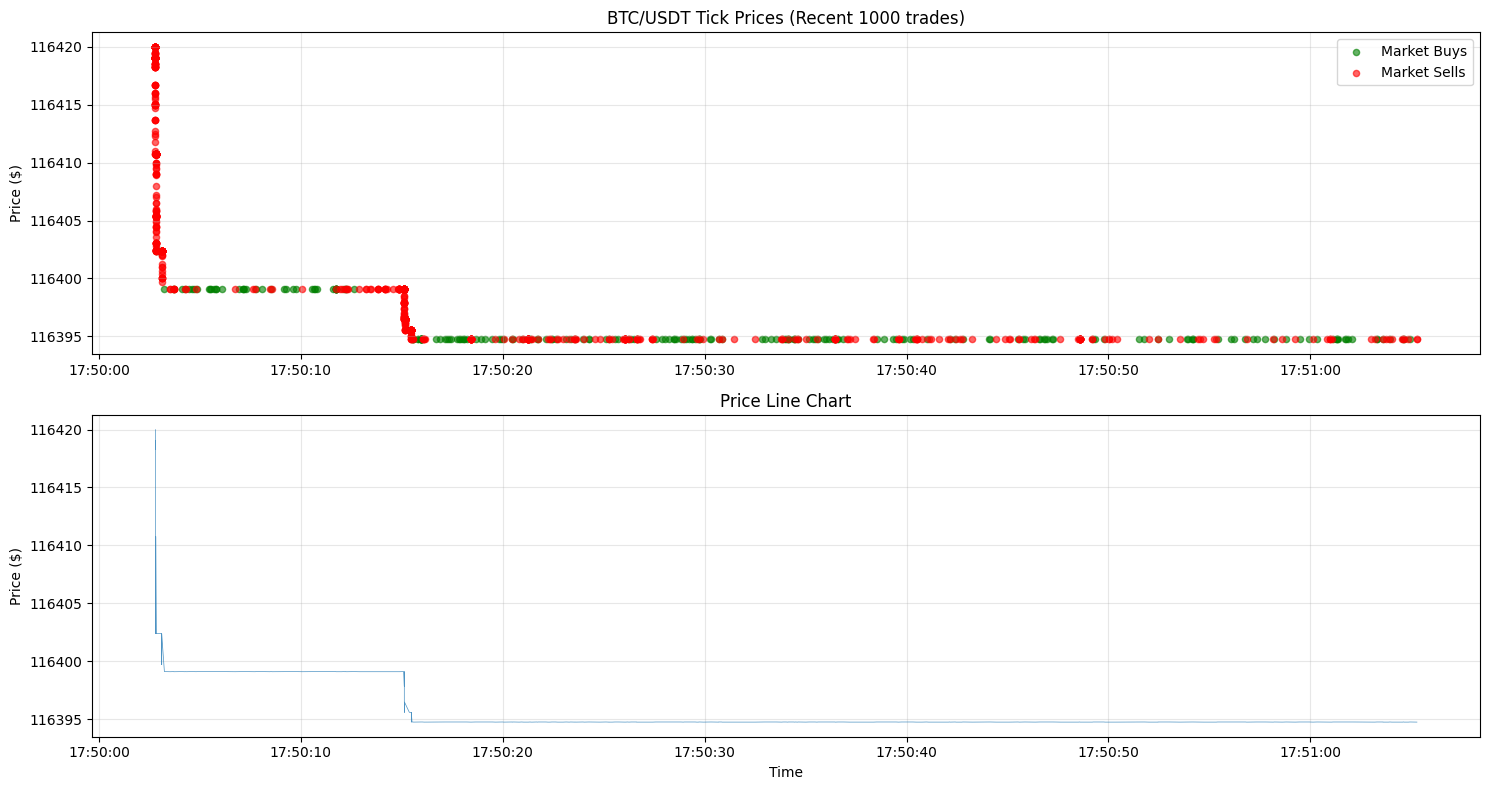

In [25]:
# Plot recent price movements
plt.figure(figsize=(15, 8))

# Separate buy and sell orders
buys = df_recent[df_recent['isBuyerMaker'] == False]  # Market buy orders
sells = df_recent[df_recent['isBuyerMaker'] == True]   # Market sell orders

plt.subplot(2, 1, 1)
plt.scatter(buys['time'], buys['price'], c='green', alpha=0.6, s=20, label='Market Buys')
plt.scatter(sells['time'], sells['price'], c='red', alpha=0.6, s=20, label='Market Sells')
plt.title('BTC/USDT Tick Prices (Recent 1000 trades)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(df_recent['time'], df_recent['price'], linewidth=0.5, alpha=0.8)
plt.title('Price Line Chart')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Volume Analysis

In [10]:
# Volume statistics
cursor.execute("""
    SELECT 
        SUM(qty) as total_btc_volume,
        SUM(quoteQty) as total_usdt_volume,
        AVG(qty) as avg_btc_per_trade,
        AVG(quoteQty) as avg_usdt_per_trade,
        COUNT(CASE WHEN isBuyerMaker = 0 THEN 1 END) as market_buys,
        COUNT(CASE WHEN isBuyerMaker = 1 THEN 1 END) as market_sells
    FROM tick_data
""")
vol_stats = cursor.fetchone()

print(f"Volume Statistics:")
print(f"  Total BTC Volume: {vol_stats[0]:,.8f} BTC")
print(f"  Total USDT Volume: ${vol_stats[1]:,.2f}")
print(f"  Avg BTC per Trade: {vol_stats[2]:,.8f} BTC")
print(f"  Avg USDT per Trade: ${vol_stats[3]:,.2f}")
print(f"  Market Buys: {vol_stats[4]:,} ({vol_stats[4]/(vol_stats[4]+vol_stats[5])*100:.1f}%)")
print(f"  Market Sells: {vol_stats[5]:,} ({vol_stats[5]/(vol_stats[4]+vol_stats[5])*100:.1f}%)")

Volume Statistics:
  Total BTC Volume: 244.78180000 BTC
  Total USDT Volume: $28,499,330.94
  Avg BTC per Trade: 0.00761019 BTC
  Avg USDT per Trade: $886.04
  Market Buys: 15,885 (49.4%)
  Market Sells: 16,280 (50.6%)


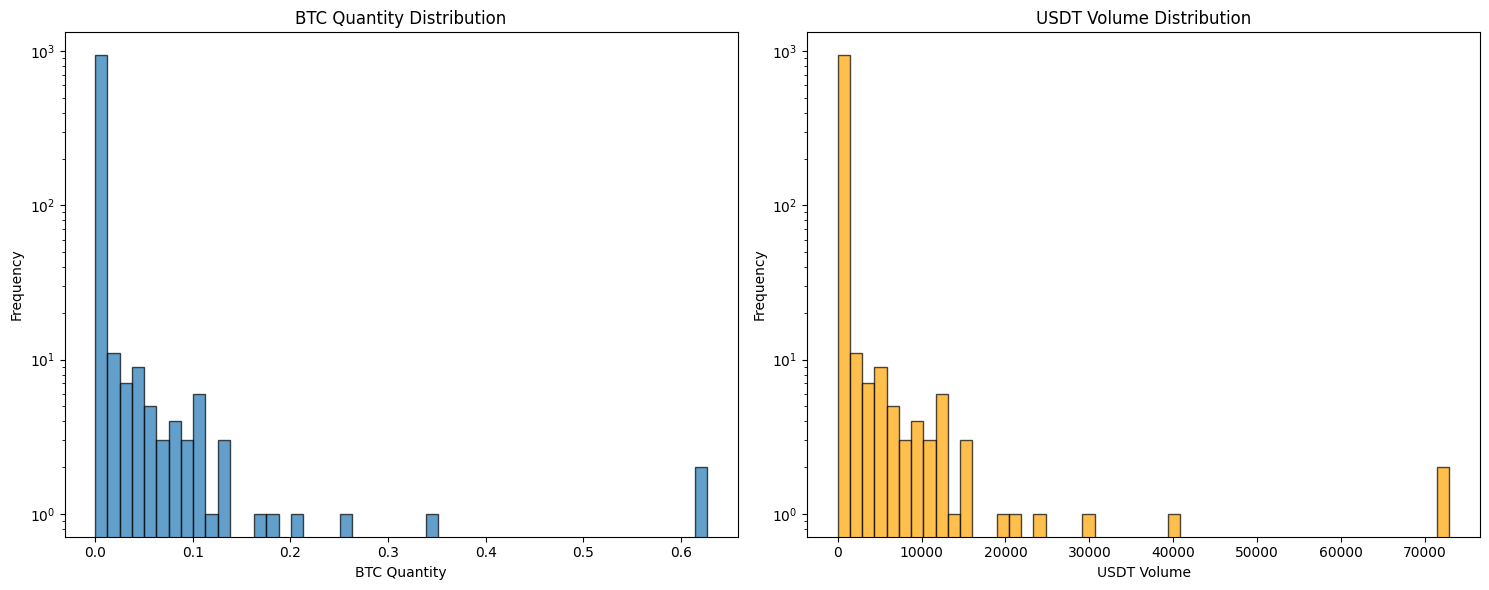

In [11]:
# Plot volume distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(df_recent['qty'], bins=50, alpha=0.7, edgecolor='black')
plt.title('BTC Quantity Distribution')
plt.xlabel('BTC Quantity')
plt.ylabel('Frequency')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(df_recent['quoteQty'], bins=50, alpha=0.7, edgecolor='black', color='orange')
plt.title('USDT Volume Distribution')
plt.xlabel('USDT Volume')
plt.ylabel('Frequency')
plt.yscale('log')

plt.tight_layout()
plt.show()

## 5. Trade Pattern Analysis

In [12]:
# Analyze buy vs sell pressure over time
df_recent['minute'] = df_recent['time'].dt.floor('1min')
minute_stats = df_recent.groupby(['minute', 'isBuyerMaker']).agg({
    'qty': 'sum',
    'quoteQty': 'sum',
    'price': 'count'
}).reset_index()

minute_stats.columns = ['minute', 'isBuyerMaker', 'btc_volume', 'usdt_volume', 'trade_count']

# Pivot to separate buy/sell columns
buy_sell_by_minute = minute_stats.pivot(index='minute', columns='isBuyerMaker', values=['usdt_volume', 'trade_count']).fillna(0)

print("Buy/Sell pressure by minute:")
display(buy_sell_by_minute.head())

Buy/Sell pressure by minute:


usdt_volume                trade_count       
isBuyerMaker                     0              1           0      1
minute                                                              
2025-10-01 17:45:00  200302.052159   33749.798488       384.0   16.0
2025-10-01 17:46:00  117771.787151  332902.030824        59.0  541.0

KeyError: ('usdt_volume', False)

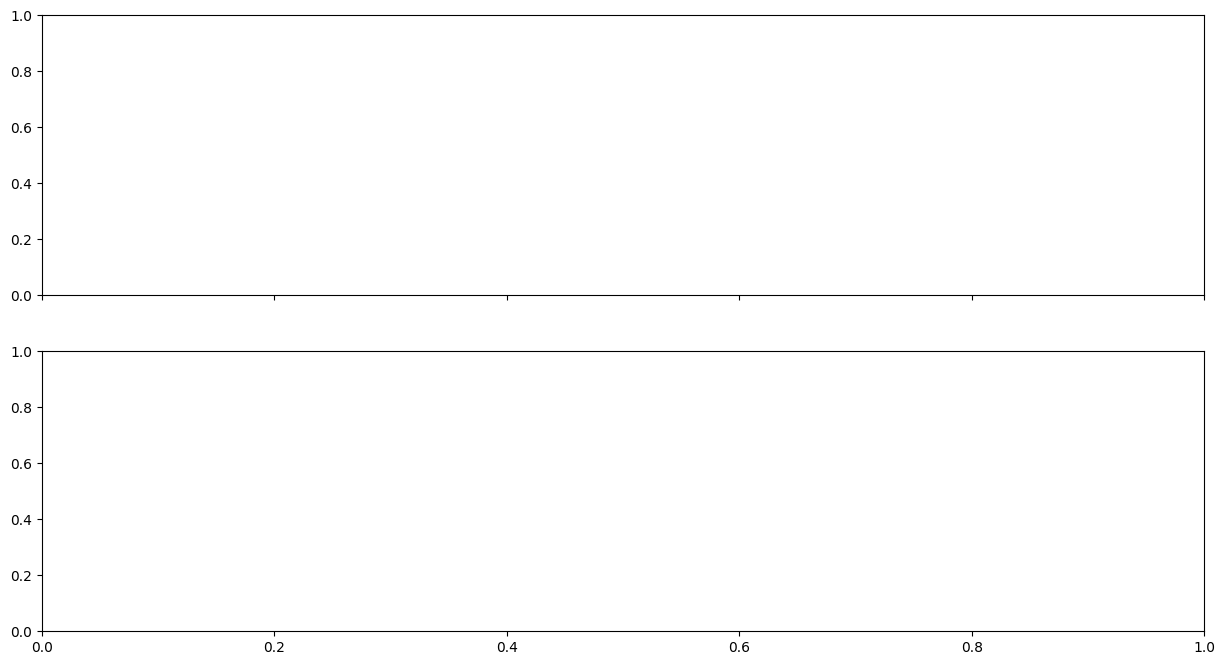

In [13]:
# Plot buy vs sell pressure
if len(buy_sell_by_minute) > 1:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
    
    # Volume comparison
    ax1.bar(buy_sell_by_minute.index, buy_sell_by_minute[('usdt_volume', False)], 
            alpha=0.7, color='green', label='Buy Volume (USDT)')
    ax1.bar(buy_sell_by_minute.index, -buy_sell_by_minute[('usdt_volume', True)], 
            alpha=0.7, color='red', label='Sell Volume (USDT)')
    ax1.set_title('Buy vs Sell Volume by Minute')
    ax1.set_ylabel('USDT Volume')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Trade count comparison
    ax2.bar(buy_sell_by_minute.index, buy_sell_by_minute[('trade_count', False)], 
            alpha=0.7, color='green', label='Buy Trades')
    ax2.bar(buy_sell_by_minute.index, -buy_sell_by_minute[('trade_count', True)], 
            alpha=0.7, color='red', label='Sell Trades')
    ax2.set_title('Buy vs Sell Trade Count by Minute')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Trade Count')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for minute-by-minute analysis")

## 6. Data Quality Checks

In [14]:
# Check for data quality issues
print("Data Quality Checks:")

# Check for duplicates
cursor.execute("SELECT COUNT(*) - COUNT(DISTINCT id) as duplicates FROM tick_data")
duplicates = cursor.fetchone()[0]
print(f"  Duplicate IDs: {duplicates}")

# Check for null values
cursor.execute("""
    SELECT 
        SUM(CASE WHEN price IS NULL THEN 1 ELSE 0 END) as null_prices,
        SUM(CASE WHEN qty IS NULL THEN 1 ELSE 0 END) as null_qty,
        SUM(CASE WHEN time IS NULL THEN 1 ELSE 0 END) as null_times
    FROM tick_data
""")
nulls = cursor.fetchone()
print(f"  Null prices: {nulls[0]}")
print(f"  Null quantities: {nulls[1]}")
print(f"  Null times: {nulls[2]}")

# Check for unrealistic prices
cursor.execute("SELECT COUNT(*) FROM tick_data WHERE price <= 0 OR price > 1000000")
bad_prices = cursor.fetchone()[0]
print(f"  Unrealistic prices: {bad_prices}")

# Check time gaps
if total_records > 1:
    cursor.execute("""
        SELECT 
            MAX(julianday(lead_time) - julianday(time)) * 24 * 60 as max_gap_minutes
        FROM (
            SELECT time, LEAD(time) OVER (ORDER BY time) as lead_time 
            FROM tick_data
        )
    """)
    max_gap = cursor.fetchone()[0]
    if max_gap:
        print(f"  Max time gap between ticks: {max_gap:.2f} minutes")

Data Quality Checks:
  Duplicate IDs: 0
  Null prices: 0
  Null quantities: 0
  Null times: 0
  Unrealistic prices: 0
  Max time gap between ticks: 1.22 minutes


## 7. Database Performance

In [15]:
# Test query performance
import time

print("Query Performance Tests:")

# Test 1: Count all records
start_time = time.time()
cursor.execute("SELECT COUNT(*) FROM tick_data")
result = cursor.fetchone()
end_time = time.time()
print(f"  Count query: {end_time - start_time:.4f} seconds ({result[0]:,} records)")

# Test 2: Time-based query (uses index)
start_time = time.time()
cursor.execute("SELECT * FROM tick_data WHERE time > datetime('now', '-1 hour') LIMIT 100")
result = cursor.fetchall()
end_time = time.time()
print(f"  Time range query: {end_time - start_time:.4f} seconds ({len(result)} records)")

# Test 3: Aggregation query
start_time = time.time()
cursor.execute("SELECT AVG(price), SUM(qty) FROM tick_data")
result = cursor.fetchone()
end_time = time.time()
print(f"  Aggregation query: {end_time - start_time:.4f} seconds")

Query Performance Tests:
  Count query: 0.1615 seconds (33,697 records)
  Time range query: 0.0582 seconds (100 records)
  Aggregation query: 0.0186 seconds


## 8. Summary

In [16]:
print("=" * 50)
print("DATABASE SUMMARY")
print("=" * 50)
print(f"Database file: {db_path}")
print(f"File size: {os.path.getsize(db_path) / (1024*1024):.2f} MB")
print(f"Total records: {total_records:,}")
if min_time and max_time:
    print(f"Collection period: {min_time} to {max_time}")
    duration = datetime.fromisoformat(max_time) - datetime.fromisoformat(min_time)
    print(f"Duration: {duration}")
    if duration.total_seconds() > 0:
        print(f"Avg ticks/second: {total_records / duration.total_seconds():.2f}")
print(f"Data quality: {'✅ Good' if duplicates == 0 and sum(nulls) == 0 and bad_prices == 0 else '⚠️ Issues detected'}")
print("=" * 50)

# Close connection
conn.close()
print("\nDatabase connection closed.")

DATABASE SUMMARY
Database file: btc_tick_data.db
File size: 4.29 MB
Total records: 28,514
Collection period: 2025-10-01T17:36:54.470000 to 2025-10-01T17:45:15.647000
Duration: 0:08:21.177000
Avg ticks/second: 56.89
Data quality: ✅ Good

Database connection closed.
